In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("TSLA.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
corr_mat=data.corr()
corr_mat["Adj Close"].sort_values()

Volume       0.505169
Open         0.998886
Low          0.999447
High         0.999640
Close        1.000000
Adj Close    1.000000
Name: Adj Close, dtype: float64

In [7]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# label=le.fit_transform(data["Date"])
# data.drop("Date",axis=1,inplace=True)
# data["Date"]=label

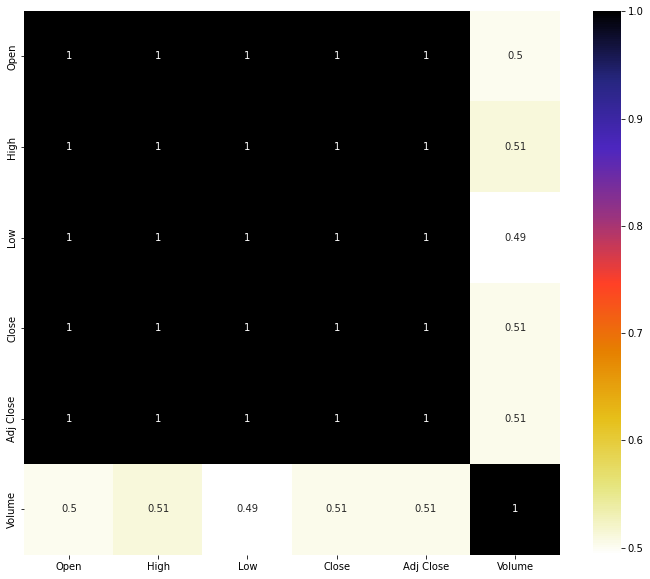

In [8]:
x=data.drop(["Close","Date","Adj Close"],axis=1).values;
y=data["Adj Close"].values
from sklearn.model_selection import train_test_split
x = pd.DataFrame(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
import seaborn as sns
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train)

[[ 0.19796275  0.20763602  0.21033551  0.22340884]
 [-0.80623172 -0.80778488 -0.8116788   0.55710331]
 [ 0.01690332  0.02616051  0.02003244 -0.08898084]
 ...
 [-0.52232249 -0.53032628 -0.52353228  0.38262992]
 [-0.13867492 -0.1033588  -0.14959123  1.17008029]
 [ 0.49499112  0.5005412   0.52881777  0.13635372]]


**Linear Regression**

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred1=lr.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[215.66 207.73]
 [ 30.52  28.28]
 [ 26.1   24.01]
 [331.34 315.23]
 [201.61 200.24]
 [213.55 210.24]
 [ 28.73  26.44]
 [ 26.26  22.79]
 [222.34 224.84]
 [355.5  353.18]
 [220.48 219.04]
 [284.71 278.48]
 [ 33.9   31.8 ]
 [105.36 102.2 ]
 [ 22.51  20.43]
 [354.7  346.05]
 [106.27 104.63]
 [262.15 260.17]
 [ 29.9   28.06]
 [227.74 225.  ]
 [368.9  359.7 ]
 [330.6  327.78]
 [225.52 220.69]
 [346.69 337.95]
 [310.75 308.74]
 [184.15 181.45]
 [341.25 336.2 ]
 [275.9  274.66]
 [230.54 227.75]
 [248.92 242.78]
 [ 28.7   26.83]
 [ 33.62  31.84]
 [ 32.82  31.17]
 [231.86 225.61]
 [398.22 393.15]
 [226.62 224.61]
 [218.22 215.15]
 [141.05 137.8 ]
 [329.92 320.1 ]
 [223.73 218.6 ]
 [313.78 307.19]
 [ 38.89  36.62]
 [ 25.2   23.21]
 [217.78 211.4 ]
 [ 30.37  28.49]
 [235.54 230.01]
 [201.05 192.73]
 [ 36.27  34.17]
 [312.84 310.12]
 [277.09 273.36]
 [235.7  229.43]
 [302.78 295.  ]
 [ 37.68  35.29]
 [221.12 214.36]
 [294.19 288.96]
 [236.17 234.51]
 [ 36.39  34.41]
 [241.43 235.6 ]
 [ 20.13  18.1

In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred1))

0.998691600068641


In [13]:
RMSE=np.sqrt(np.mean( y_test -y_pred1 )**2)
RMSE

3.5994158353481427

In [14]:
from sklearn.metrics import mean_squared_error
l_m=mean_squared_error(y_test,y_pred1)
l_m

18.29948288836905

Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

In [16]:
y_pred2 = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[215.56 207.73]
 [ 30.44  28.28]
 [ 26.18  24.01]
 [324.92 315.23]
 [201.59 200.24]
 [213.5  210.24]
 [ 28.79  26.44]
 [ 26.96  22.79]
 [222.46 224.84]
 [355.43 353.18]
 [220.6  219.04]
 [284.82 278.48]
 [ 33.8   31.8 ]
 [105.47 102.2 ]
 [ 22.43  20.43]
 [354.52 346.05]
 [106.45 104.63]
 [262.05 260.17]
 [ 29.84  28.06]
 [227.37 225.  ]
 [368.63 359.7 ]
 [330.53 327.78]
 [225.5  220.69]
 [346.55 337.95]
 [310.65 308.74]
 [184.58 181.45]
 [341.13 336.2 ]
 [275.95 274.66]
 [230.75 227.75]
 [249.35 242.78]
 [ 28.65  26.83]
 [ 33.62  31.84]
 [ 32.91  31.17]
 [232.09 225.61]
 [398.1  393.15]
 [226.85 224.61]
 [218.09 215.15]
 [141.82 137.8 ]
 [329.72 320.1 ]
 [223.51 218.6 ]
 [314.05 307.19]
 [ 38.75  36.62]
 [ 25.33  23.21]
 [218.22 211.4 ]
 [ 30.32  28.49]
 [235.72 230.01]
 [201.18 192.73]
 [ 36.18  34.17]
 [312.58 310.12]
 [276.95 273.36]
 [235.61 229.43]
 [303.06 295.  ]
 [ 37.77  35.29]
 [221.3  214.36]
 [294.04 288.96]
 [236.32 234.51]
 [ 36.33  34.41]
 [241.4  235.6 ]
 [ 20.22  18.1

In [17]:
print(r2_score(y_test,y_pred2))

0.9987292636951336


SVR

In [18]:
#y = y.reshape(len(y),1)

In [19]:
from sklearn.svm import SVR
svrreg = SVR(kernel = 'rbf')
svrreg.fit(x_train, y_train)
y_pred3=svrreg.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[212.73 207.73]
 [ 30.04  28.28]
 [ 29.15  24.01]
 [326.44 315.23]
 [203.18 200.24]
 [214.27 210.24]
 [ 29.66  26.44]
 [ 49.23  22.79]
 [228.26 224.84]
 [324.15 353.18]
 [222.9  219.04]
 [288.22 278.48]
 [ 31.81  31.8 ]
 [106.94 102.2 ]
 [ 30.27  20.43]
 [330.85 346.05]
 [175.7  104.63]
 [264.14 260.17]
 [ 30.97  28.06]
 [226.29 225.  ]
 [338.41 359.7 ]
 [325.12 327.78]
 [225.57 220.69]
 [333.83 337.95]
 [309.32 308.74]
 [186.88 181.45]
 [332.21 336.2 ]
 [279.55 274.66]
 [224.43 227.75]
 [255.61 242.78]
 [ 29.51  26.83]
 [ 31.34  31.84]
 [ 30.96  31.17]
 [231.97 225.61]
 [304.46 393.15]
 [214.24 224.61]
 [217.5  215.15]
 [160.81 137.8 ]
 [322.08 320.1 ]
 [223.4  218.6 ]
 [317.51 307.19]
 [ 34.39  36.62]
 [ 30.85  23.21]
 [220.2  211.4 ]
 [ 30.09  28.49]
 [238.59 230.01]
 [202.66 192.73]
 [ 32.91  34.17]
 [305.41 310.12]
 [277.44 273.36]
 [241.46 229.43]
 [309.19 295.  ]
 [ 37.13  35.29]
 [222.21 214.36]
 [295.93 288.96]
 [230.8  234.51]
 [ 32.65  34.41]
 [242.87 235.6 ]
 [ 30.14  18.1

In [20]:
print(r2_score(y_test,y_pred3))

0.918610779348926
